In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/used_cars.csv')

In [3]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [5]:
with open('../data/data_source_link_and _description.txt','r') as f:
    print(f.read())

Used Car Price Prediction Dataset

https://www.kaggle.com/datasets/taeefnajib/used-car-price-prediction-dataset/data

About Dataset
Used Car Price Prediction Dataset is a comprehensive collection of automotive information extracted from the popular automotive marketplace website, https://www.cars.com. This dataset comprises 4,009 data points, each representing a unique vehicle listing, and includes nine distinct features providing valuable insights into the world of automobiles.

Brand & Model: Identify the brand or company name along with the specific model of each vehicle.
Model Year: Discover the manufacturing year of the vehicles, crucial for assessing depreciation and technology advancements.
Mileage: Obtain the mileage of each vehicle, a key indicator of wear and tear and potential maintenance requirements.
Fuel Type: Learn about the type of fuel the vehicles run on, whether it's gasoline, diesel, electric, or hybrid.
Engine Type: Understand the engine specifications, shedding li

In [7]:
df.shape

(4009, 12)

In [8]:
df.isna().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [9]:
percent_missing = 100*df.isna().sum()/len(df)

In [13]:
percent_missing = percent_missing[percent_missing>0]

Text(0.5, 1.0, 'missing value percentages of features')

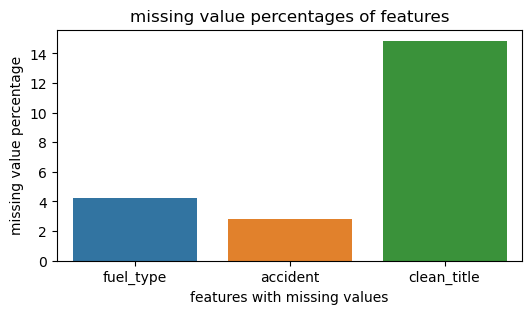

In [18]:
plt.figure(figsize=(6,3))
sns.barplot(x = percent_missing.index, y=percent_missing)
plt.xlabel('features with missing values')
plt.ylabel('missing value percentage')
plt.title('missing value percentages of features')

In [25]:
df['model_year'].describe()

count    4009.000000
mean     2015.515590
std         6.104816
min      1974.000000
25%      2012.000000
50%      2017.000000
75%      2020.000000
max      2024.000000
Name: model_year, dtype: float64

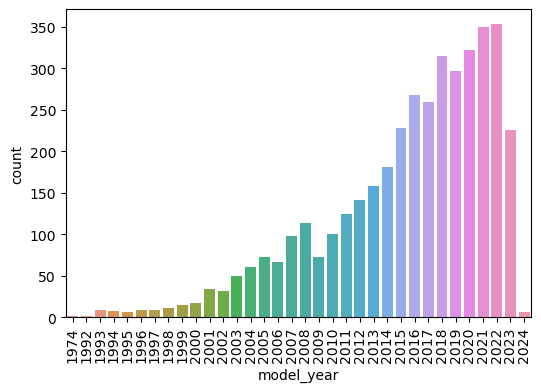

In [31]:
#yearwise car counts
plt.figure(figsize=(6,4))
sns.countplot(x='model_year',data=df)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='count', ylabel='brand'>

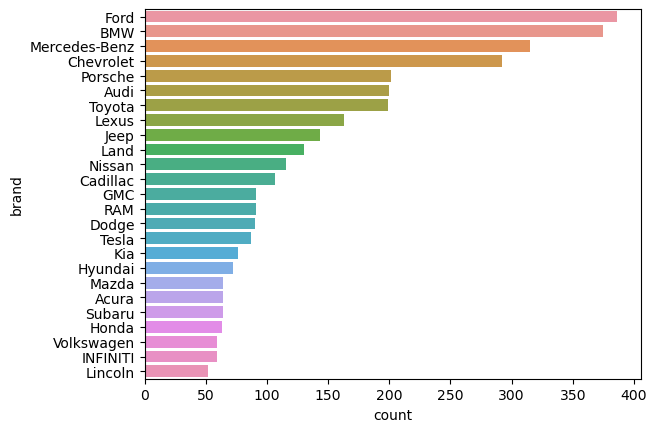

In [42]:
#top 20 brands
top = 25
top_brands = df.brand.value_counts().sort_values(ascending=False)[:top]
sns.barplot(y=top_brands.index, x=top_brands)

In [43]:
df['fuel_type'].value_counts()

fuel_type
Gasoline          3309
Hybrid             194
E85 Flex Fuel      139
Diesel             116
–                   45
Plug-In Hybrid      34
not supported        2
Name: count, dtype: int64

In [44]:
df['ext_col'].value_counts()

ext_col
Black                       905
White                       816
Gray                        496
Silver                      374
Blue                        349
                           ... 
Anthracite Blue Metallic      1
Moonlight Cloud               1
Silver Mist                   1
Cirrus Silver Metallic        1
C / C                         1
Name: count, Length: 319, dtype: int64

Text(0, 0.5, 'top 15 exterior color counts')

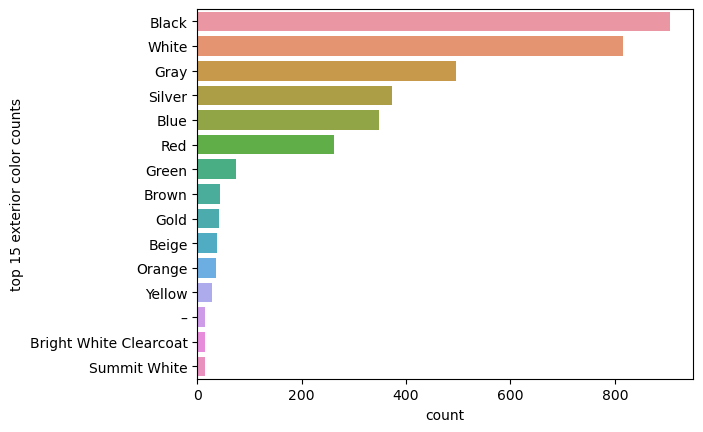

In [48]:
top = 15
top_exterior_color = df.ext_col.value_counts().sort_values(ascending=False)[:top]
sns.barplot(y=top_exterior_color.index, x=top_exterior_color)
plt.ylabel(f'top {top} exterior color counts')

In [47]:
df['int_col'].value_counts()

int_col
Black               2025
Beige                538
Gray                 472
Brown                157
–                    133
                    ... 
Almond Beige           1
Kyalami Orange         1
Sakhir Orange          1
Tan/Ebony              1
Black / Graphite       1
Name: count, Length: 156, dtype: int64

Text(0, 0.5, 'top 15 interior color counts')

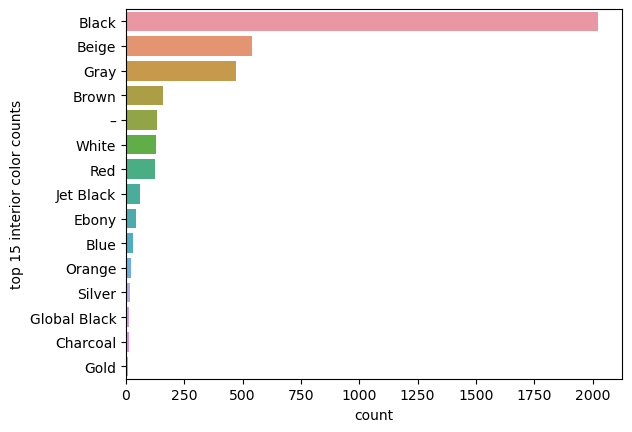

In [49]:
top = 15
top_interior_color = df.int_col.value_counts().sort_values(ascending=False)[:top]
sns.barplot(y=top_interior_color.index, x=top_interior_color)
plt.ylabel(f'top {top} interior color counts')

In [50]:
df['accident'].value_counts()

accident
None reported                             2910
At least 1 accident or damage reported     986
Name: count, dtype: int64

<Axes: xlabel='accident', ylabel='count'>

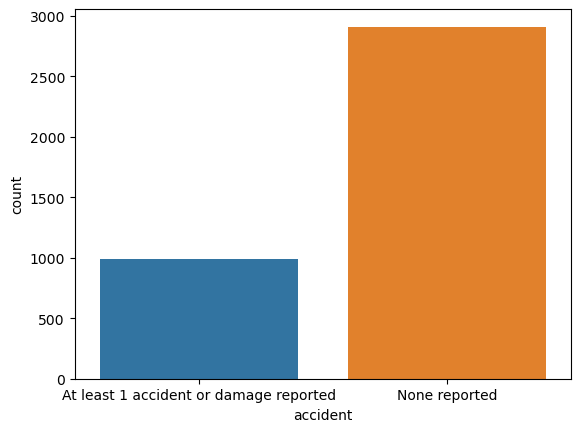

In [53]:
sns.countplot(x='accident',data=df)

In [54]:
df['clean_title'].value_counts()

clean_title
Yes    3413
Name: count, dtype: int64

In [56]:
df['price'].unique()

array(['$10,300', '$38,005', '$54,598', ..., '$59,335', '$349,950',
       '$90,998'], dtype=object)

In [73]:
def price_clean(price):
    cleaned_price = price[1:].split(',')
    cleaned_price = ''.join(cleaned_price)
    return int(cleaned_price)

In [74]:
print(price_clean("$10,300"))

10300


In [76]:
cleaned_price = df['price'].apply(price_clean)

<Axes: xlabel='price', ylabel='Count'>

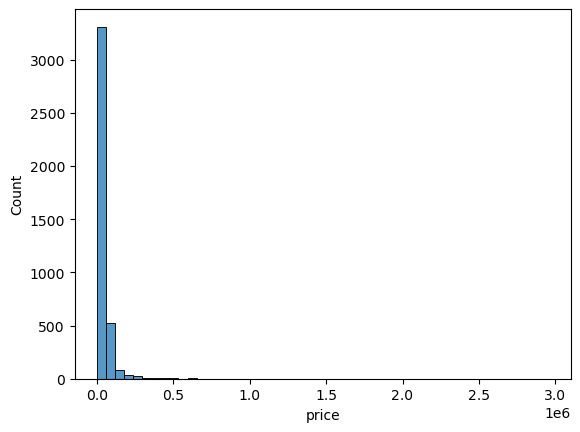

In [85]:
sns.histplot(x=cleaned_price,bins=50)